# The Sparks Foundation - GRIP

# Data Science and Business Analytics

# Task 1- Predict the score of an student based on the no. of hours studied

# Author - Vrushali Rajesh Sarwan

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Changing the directory to access the data
import os
os.chdir(r'C:\Users\Admin\3D Objects\The Spark Foundation\Task 1')

In [3]:
df = pd.read_csv('student_scores - student_scores.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0, 0.5, 'Scores')

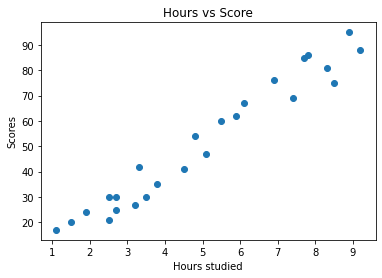

In [8]:
plt.scatter(x = 'Hours', y = 'Scores', data = df)
plt.title('Hours vs Score')
plt.xlabel('Hours studied')
plt.ylabel('Scores')

 **From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and the score.**

### **Preparing the data**

This step involves segreggating the attribues of the dataset as inputs and labels as output

In [9]:
X = df.drop('Scores', axis = 1)
y = df['Scores']

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll be using  train_test_split() method from Scikit-Learn built-in library

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets. Now we are finally set to train our algorithm. 

In [11]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


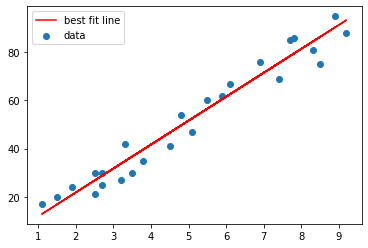

In [12]:
# Plotting the regression line
line = lr.coef_*X + lr.intercept_

# Plotting for the test data
plt.scatter(X, y, label = 'data')
plt.plot(X, line, label = 'best fit line',color = 'r')
plt.legend()
plt.show()

In [13]:
lr.score(X_test,y_test)

0.9367661043365055

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [14]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [16]:
# You can also test with your own data
hours = [9.25]
own_pred = lr.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.89272889341655
